Avtor: Gregor Podpečan,  Vpisna številka: 23150289

Datum: 18.01.2020

Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se       zavedam,da ne bom izpolnjeval pogojev za pristop k izpitu.

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definicija-naloge" data-toc-modified-id="Definicija-naloge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definicija naloge</a></span></li><li><span><a href="#Analiza-meta-z-zračnim-uporom." data-toc-modified-id="Analiza-meta-z-zračnim-uporom.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analiza meta z zračnim uporom.</a></span><ul class="toc-item"><li><span><a href="#Definicija-enačb" data-toc-modified-id="Definicija-enačb-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definicija enačb</a></span></li><li><span><a href="#Numerična-analiza-in-reševanje-differencialnih-enačb" data-toc-modified-id="Numerična-analiza-in-reševanje-differencialnih-enačb-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Numerična analiza in reševanje differencialnih enačb</a></span></li></ul></li><li><span><a href="#Simbolno-reševanje" data-toc-modified-id="Simbolno-reševanje-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simbolno reševanje</a></span><ul class="toc-item"><li><span><a href="#Simbolni-izračun-sile-upora" data-toc-modified-id="Simbolni-izračun-sile-upora-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simbolni izračun sile upora</a></span></li></ul></li><li><span><a href="#Interpolacija" data-toc-modified-id="Interpolacija-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpolacija</a></span></li><li><span><a href="#Izračun-ničle-funkcije" data-toc-modified-id="Izračun-ničle-funkcije-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Izračun ničle funkcije</a></span></li><li><span><a href="#Odvajanje" data-toc-modified-id="Odvajanje-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Odvajanje</a></span></li><li><span><a href="#Sistem-linearnih-enacb" data-toc-modified-id="Sistem-linearnih-enacb-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sistem linearnih enacb</a></span></li><li><span><a href="#Dodatki-projektni-nalogi" data-toc-modified-id="Dodatki-projektni-nalogi-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dodatki projektni nalogi</a></span><ul class="toc-item"><li><span><a href="#Aproximacija" data-toc-modified-id="Aproximacija-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Aproximacija</a></span></li><li><span><a href="#Uporabniški-vmesnik" data-toc-modified-id="Uporabniški-vmesnik-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Uporabniški vmesnik</a></span></li></ul></li></ul></div>

Za pisanje enačb v latex obliki sem si pomagal z:

<a href="https://www.codecogs.com/latex/eqneditor.php">Editor latex</a>

# Definicija naloge

Za projekt pri numeričnih metodah sem si izbral gibanje izstreljene žogice z upoštevanjem upora zraka. Ideja se mi je zdela
primerna saj smo z silami, ki delujejo v tem primeru v stiku vsak dan. Priložena slika ponazarja pot izstrelka.

<img src="Slika.jpg" style = "width:600px;height:400px"/> 

Vir:https://www.quora.com/While-considering-the-projectile-motion-the-effect-of-air-resistance-is-usually-ignored-If-however-air-resistance-is-not-ignored-what-is-its-effect-on-the-path-of-the-projectile (18.01.2020)

Namen individualnega seminarja je prikazati ustrezno izbiro in uporabo numeričnih metod, komentirati njihovo delovanje in ovrednotiti dobljene rezultate. Reševanje našega fizikalnega problema mora zajemati sledeča poglavja:
* Simbolno reševanje
* Sistemi linearnih enačb
* Interpolacija ali aproksimacija
* Iskanje ničel
* Integriranje ali odvajanje
* Reševanje diferencialnih enačb

# Analiza meta z zračnim uporom.

Definicija osnovnih enačb za analizo.

In [1]:
%matplotlib inline
%matplotlib notebook

from math import pi, cos, sin, tan
import matplotlib
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## Definicija enačb


$$F_{upora} = ma_{upora} = \frac{1}{2}c_v\rho v^2S = \frac{1}{2}c_v\rho_z v^2 \pi r^2$$

$$F_{teze} = mg$$

$ $
$$F_{y} = F_{teze} + F_{upora_y}$$
$ $
$$F_{x} = F_{upora_x}$$

Zapišemo diferencialne enačbe iz zgoraj definiranih enačb katere bodo osnova za reševanje v nadaljevanju.

$$m\frac{d^2y}{dt^2} = - mg - \frac{1}{2}c_v\rho_z \left(\frac{dy}{dt}\right)^2 \pi r^2$$
$$m\frac{d^2x}{dt^2} = - \frac{1}{2}c_v\rho_z \left(\frac{dx}{dt}\right)^2 \pi r^2$$

 Pri čemer naslednji spisek pojasnjuje obstoj simbolov v zgornjih enačbah.
* $m$ = skupna masa zoge $(0.4kg)$
* $g$ = gravitacijski pospesek $\left(9.81 m/s^2\right)$
* $\rho_z$ = gostota zraka $\left(1.2 kg/m^3\right)$
* $r$ = radij zoge $(0.1m)$
* $c_v$ = sferni koelificijent upora $(0.47)$

##  Numerična analiza in reševanje differencialnih enačb

Za reševanje diferencialnih enačb bi lahko uporabili solve_ivp vendar je funkcija dokaj enostavna (brez visokih diferencialov). 
Zato sem k reševanju diferencialnih enačb pristopil iterativno.

In [2]:
m = 0.4
g = 9.81
r = 0.1
Cv = 0.47
rho = 1.2
pi = 3.146

def upor(v): #Zaviralni pospesek vetra
    return (- 1/2 * Cv * rho * v**2 * pi * r**2)/m

# Definicija zacetnih pogojev
vx0 = 1300
vy0 = 20
x0 = 0
y0 = 0

# Definicija koraka
dt = 0.01

def simulacija_meta(dt, vx0, vy0, x0, y0):
    '''
    Izračun diferencialne enačbe leta izstrelka z upoštevanjem zračnega upora.
    Funkcija vrne vrednosti x in y koordinat izstrelka med letom vektorja hitrosti v smeri x in y ter časovne vrednosti 
    pri koraku dt. Reševanje diferencialne enačbe zaključimo, ko je višina izstrelka negativna.
    
    Argumenti:
    
    dt:  korak časa, ki ga iteracija uporabi za nov izračun
    vx0: začetna hitrost v x smeri
    vy0: začetna hitrost v y smeri
    x0:  začetna vrednost x (začnemo v izhodišču koordinatnega sistema)
    y0:  začetna vrednost y (začnemo v izhodišču koordinatnega sistema)
    
    
    '''
    
    # Lista izracunov
    vx = [vx0]
    vy = [vy0]
    x = [x0]
    y = [y0]
    t = [0]
    
    # Numericno resevanje
    while True:
        alfa = tan(vy[-1]/vx[-1]) # Naklon smeri hitrosti
        v = (vx[-1]**2 + vy[-1]**2)**0.5 # Vsota vektorja hitrosti
        u = upor(v) # Izracun upora vetra
        uX = u*cos(alfa) # Upor po x
        uY = u*sin(alfa) # Upor po y
        vx.append(vx[-1] + uX*dt) # Izracun nove hitrosti vetra po x
        vy.append(vy[-1] -g*dt + uY*dt) # Izracun nove hitrosti vetra po y
        x.append(x[-1] + vx[-1]*dt) # Izracun novih kordinat
        y.append(y[-1] + vy[-1]*dt) # Izracun novih kordinat
        t.append(t[-1]+dt)
        if y[-1]<0:
            return t, x, y, vx, vy

tN, x, y, vxN,vyN = simulacija_meta(dt, vx0, vy0, x0, y0)

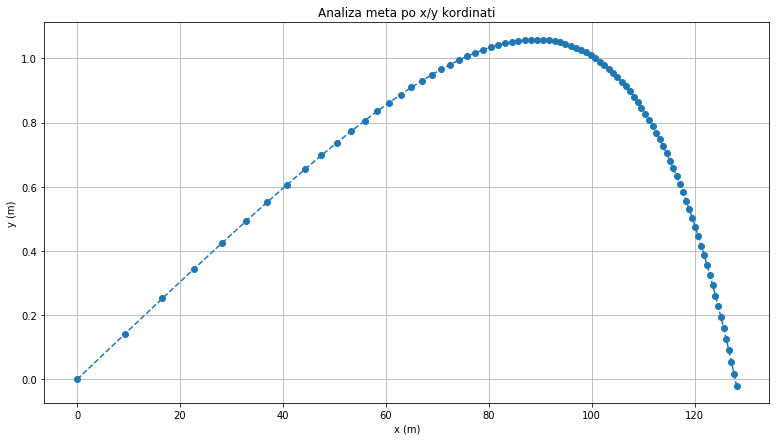

In [3]:
# Izrišemo graf

plt.figure(figsize=(13,7))
plt.plot(x, y, linestyle='--', marker='o')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Analiza meta po x/y kordinati')
plt.grid()
plt.show()

Zgoraj je prikazana pot izstrelka (žoge), ki smo jo dobili z iterativnim računanjem diferecialnih enačb. Vidimo, da žogo izstrelimo pod kotom 45 stopinj.

#  Simbolno reševanje

Termin simbolno računanje pomeni, da matematične izraze rešujemo strojno v obliki abstraktnih simbolov (in ne numerično). Strojno simbolno računanje nam pomaga kadar nas zanima rezultat v simbolni obliki in so izrazi preobsežni za klasično reševanje na list in papir. K strojnemu reševanju se zatečemo tudi zaradi zmanjšanja možnosti napake (pri obsežnih izračunih se ljudje lahko zmotimo).

prof.dr. Slavič, Janko.*Programiranje in numerične metode v ekosistemu Python* Ljubljana, 2020

In [4]:
# Definiramo parametre

sym.init_printing()

A1, A2, A3, t = sym.symbols("A_1, A_2, A_3, t")

m = 0.4       # Masa izstrelka [kg]
g = 9.81      # Gravitacijski pospešek [m/s^2]
rho = 1.2     # Gostota zraka [kg/m^3]
r = 0.1       # Polmer žogice (izstrelka) [m]
Cv = 0.47     # Koeficient upora krogle (izstrelka) [/]
PI = 3.146    # Vrednost pi
alpha = PI/4  # Kot pod katerim izstrelimo izstrelek 
v_0 = 10      # Začetna hitrost

vx = v_0 * cos(alpha) # Hitrost v x smeri
vy = v_0 * sin(alpha) # Hitrost v y smeri

parametri_sym = {
    A1: m,
    A2: -m*g,
    A3: - (1/2) * Cv * rho * PI * r**2
}

display(parametri_sym)

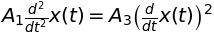

In [5]:
#Pripravimo diferencialno enačbo (x)

x_f = sym.Function('x')

x_diff_enacba = sym.Eq(A1*x_f(t).diff(t, 2), A3 * x_f(t).diff(t, 1)**2)

x_diff_enacba

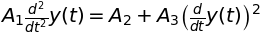

In [6]:
# Pripravimo diferencialno enačbo (y)

y_f = sym.Function('y')

y_diff_enacba = sym.Eq(A1*y_f(t).diff(t, 2), A2 + A3 * y_f(t).diff(t, 1)**2)

y_diff_enacba

In [7]:
# Rešimo diferencialno enačbo (x)

x_diff_resitev = sym.dsolve(x_diff_enacba, x_f(t))
display(x_diff_resitev)

⎡             ⎛      A₁      ⎞                               ⎤
⎢       A₁⋅log⎜──────────────⎟                               ⎥
⎢             ⎝A₃⋅(C₁ + C₂⋅t)⎠         ⎧C₁⋅t + C₂  for A₃ = 0⎥
⎢x(t) = ──────────────────────, x(t) = ⎨                     ⎥
⎣                 A₃                   ⎩   nan     otherwise ⎦

Simbolično bi diferencialno enačbo po y-u rešili z napisanim spodaj.
Komentar: Ko sem projektno delal doma na PC-ju je delalo normalno, ko pa sem jo pisal v Ljubljani na laptopu pa kode ni izvršilo
zato sem jo dodal ko komentar.

In [8]:
#y_diff_resitev = sym.dsolve(y_diff_enacba, y_f(t)) 
#display(y_diff_resitev)

##  Simbolni izračun sile upora

Zanima nas sila upora, ki deluje na žogo med letom oziroma pri začetni hitrosti, saj vemo, 
da se hitrost žoge med letom zmanjšuje.
* $m$ = skupna masa zoge $(0.4kg)$
* $\rho_z$ = gostota zraka $\left(1.2 kg/m^3\right)$
* $r$ = radij zoge $(0.1m)$
* $c_v$ = sferni koeficient upora $(0.47)$
* $v_0$ = začetna hitrost zoge $(1300 )$ #Še enote

Enačbaza presek žoge
$$S = \pi r^2$$

Enačba za silo upora žoge
$$F_{upora} = ma_{upora} = \frac{1}{2}c_v\rho v^2S = \frac{1}{2}c_v\rho_z v^2 \pi r^2$$

In [9]:
# Z uporabo simbolnega računanja pripravimo enačbo za silo upora.
from sympy.abc import rho
F, Cv, rho, v_0 , pi, r = sym.symbols("F, Cv, rho, v_0 , pi, r")
sila_upora = sym.Eq(F,1/2 * Cv * rho * v_0**2 * sym.pi * r**2)
sila_upora

In [10]:
#Izračunamo silo upora.
parametri = {Cv : 0.47, rho : 1.2, v_0 : 10, r : 0.1}
sila_upora_res = sila_upora.subs(parametri).evalf(n=5)
display(sila_upora_res)

#  Interpolacija

Pri interpolaciji izhajamo iz tabele različnih vrednosti, določiti pa želimo vmesne vrednosti. V okviru interpolacije točke
povežemo tako, da predpostavimo neko funkcijo in dodamo pogoj, da mora funkcija potekati skozi točke. 

prof.dr. Slavič, Janko.*Programiranje in numerične metode v ekosistemu Python* Ljubljana, 2020


In [11]:
from scipy.interpolate import interp1d

In [12]:
interpolacija = interp1d(x, y, kind = "quadratic", fill_value="extrapolate")

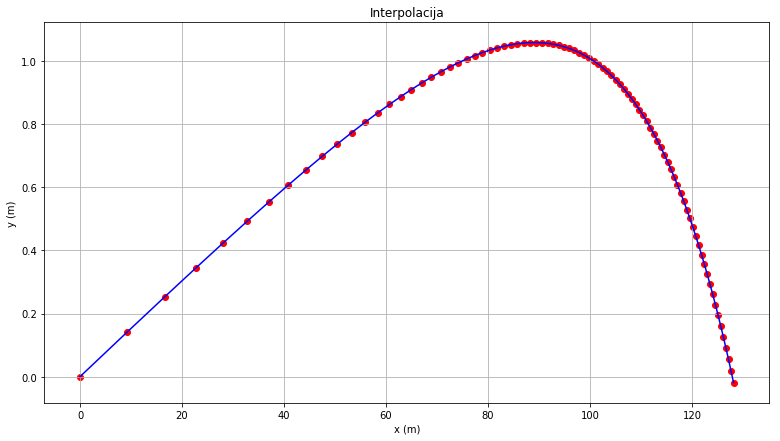

In [13]:
plt.figure(figsize=(13,7))
plt.plot(x, y, color='b')
plt.scatter(x, interpolacija(x), color = "r", marker = "o", )
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Interpolacija")
plt.grid()
plt.show()


#  Izračun ničle funkcije

V okviru reševanja enačb obravnavamo poljubno enačbo, ki je odvisna od spremenljivke x in iščemo rešitev: f(x) = 0. Rešitvam enačbe rečemo tudi koreni. Koren enačbe f(x) = 0 je hkrati tudi ničla funkcije y = f(x).Funkcija y = f(x) ima lahko ničle stopnje:

* Ničla prve stopnje: Funkcija seka abcisno os pod neničelnim kotom,
* Ničla sode stopnje: funkcija se dotika abcisne osi, vendar je ne seka,
* Ničla lihe stopnje: funkcija seka abcisno os, pri ničli stopnje 3 in    imamo prevoj(tangenta je vzporedna z abcisno osjo).

prof.dr. Slavič, Janko.*Programiranje in numerične metode v ekosistemu Python* Ljubljana, 2020

In [40]:
from scipy.optimize import bisect

nicla = bisect(interpolacija, 120, 140)

print("---------------------")
print(f"Ničla najdena: {nicla}")

---------------------
Ničla najdena: 127.8950387122461


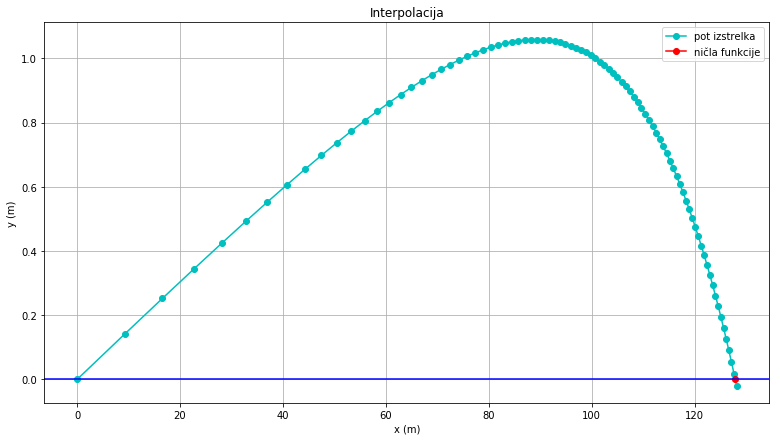

In [15]:
plt.figure(figsize =(13,7))
plt.plot(x, interpolacija(x), color = "c", marker = "o", label = "pot izstrelka")
plt.plot(nicla, 0, color = "r", marker = "o", label = "ničla funkcije")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Interpolacija")
plt.legend()
plt.grid()
plt.axhline(0, color = "b")
plt.show()

# Odvajanje

V okviru tega poglavja bomo za dano funkcijo $v_x$, $v_y$ izračunali pospešek preko gradienta teh funkcij:

$$ a_{x} = \frac{d}{dt}v_x(t)$$
$ $
$$ a_{y} = \frac{d}{dt}v_y(t)$$
$ $
$$ a = \sqrt{\left( a_{x}^2 + a_{y}^2 \right)}$$
    


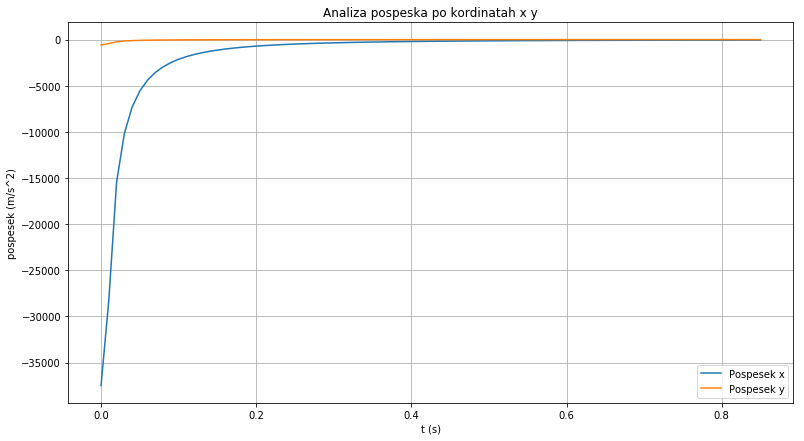

In [16]:
x_pospesek = np.gradient(vxN, tN)
y_pospesek = np.gradient(vyN, tN)

plt.figure(figsize=(13,7))
plt.plot(tN, x_pospesek, label="Pospesek x")
plt.plot(tN, y_pospesek, label="Pospesek y")
plt.title('Analiza pospeska po kordinatah x y')
plt.ylabel('pospesek (m/s^2)')
plt.xlabel('t (s)')
plt.grid()
plt.legend()
plt.show()

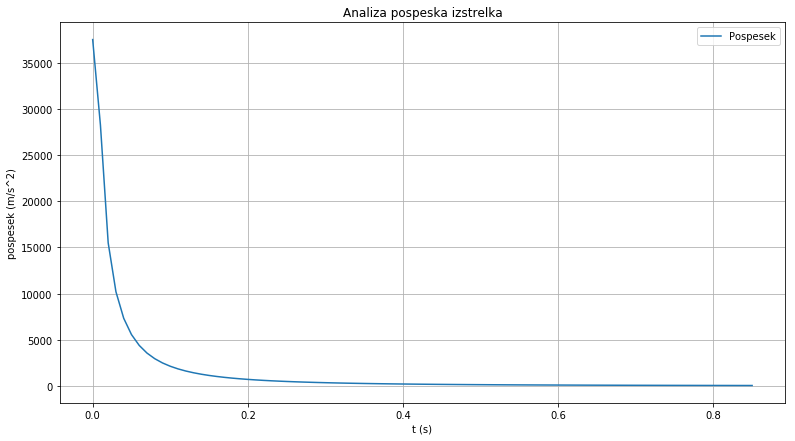

In [17]:
pospesek = (x_pospesek**2 + y_pospesek**2)**(1/2)

plt.figure(figsize=(13,7))
plt.plot(tN, pospesek, label="Pospesek")
plt.title('Analiza pospeska izstrelka')
plt.ylabel('pospesek (m/s^2)')
plt.xlabel('t (s)')
plt.grid()
plt.legend()
plt.show()

Pospešek je največji na začetku saj izstrelimo žogo. Zaradi velike hitrosti v začetnih trenutkih deluje tudi največja sila upora zraka. Zaradi tega se pospešek hitro zmanjša.

# Sistem linearnih enacb



Sistem enačb lahko zapišemo tudi v matrični obliki:

$$ Ax = b$$

kjer sta A in b znana matrika in vektor, vektor x pa ni znan. Matriko A imenujemo matrika koeficientov, vektor b imenujemo vektor konstant in vektor x vektor neznank.


prof.dr. Slavič, Janko.*Programiranje in numerične metode v ekosistemu Python* Ljubljana, 2020


Z uporabo sistema linearnih enačb bom iskal hitrost v najvišji točki meta, nato pa jo bom primerjal z izračunano vrednostjo, ki sem jo pridobil z iterativnim izračunom diferencialnih enačb.

Najprej potrebujemo najvišjo točko meta.

In [18]:
max_y = max(y)
max_y

In [19]:
# Poiščemo indeks najvišje točke.
indeks = y.index(max_y)
indeks


In [20]:
# Poiščemo še x koordinato najvišje točke.
x_hmax = x[32]
x_hmax

In [21]:
# Izračunamo koeficiente linearne funkcije.
koef_123 = np.polyfit(tN, x, deg=1)
koef_123_1 = koef_123[0]
koef_123_2 = koef_123[1]
print(koef_123)

[117.49891428  41.72206143]


In [22]:
# Simbolično prikažemo funkcijo.
x_1, t = sym.symbols("x_1, t")
func = sym.Eq(x_1, koef_123_1*t + koef_123_2)


$$x{=117.498914284591t+41.7220614322062 }$$

In [23]:
# Imamo koeficiente in ustvarimo objekt polinom.
polinom = np.poly1d(koef_123)
polinom

poly1d([117.49891428,  41.72206143])

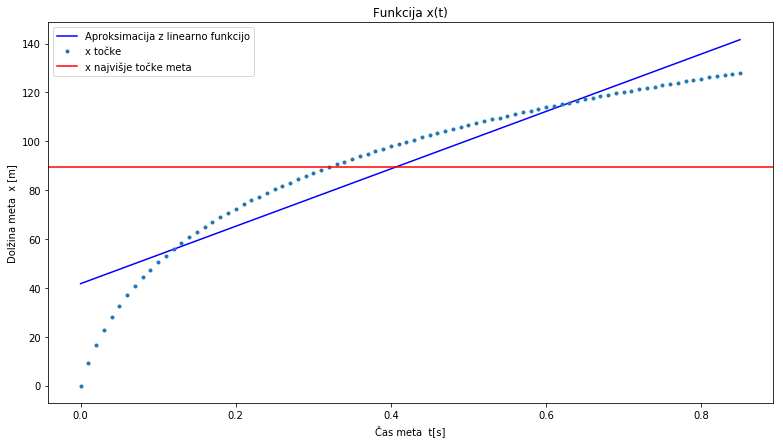

In [24]:
# Graf lege x v odvisnosti od časa t
plt.figure(figsize=(13,7))
plt.plot(tN, polinom(tN), "b", label = "Aproksimacija z linearno funkcijo")
plt.plot(tN, x, ".", label="x točke")
plt.axhline(x_hmax, color= "r", label = "x najvišje točke meta")
plt.title("Funkcija x(t)")
plt.xlabel("Čas meta  t[s]")
plt.ylabel("Dolžina meta  x [m]")
plt.legend()




Definirajmo nas sistem v matricni obliki da ga bomo lahko resili.

$$
\begin{bmatrix}
117.50 & 1 \\
0 & 1
\end{bmatrix} 
\begin{bmatrix}
y \\
x
\end{bmatrix} 
=
\begin{bmatrix}
41.72 \\
89.41
\end{bmatrix} 
$$



In [25]:
# Zapišemo sistem linearnih enačb

A = np.array([[koef_123_1, 1],
              [0, 1]])

b = np.array([koef_123_2, x_hmax])
print(A)
print(b)

[[117.49891428   1.        ]
 [  0.           1.        ]]
[41.72206143 89.40573044]


In [26]:
# Izračunamo presečišče.

presecisce = np.linalg.solve(A, b)
presecisce

array([-0.40582221, 89.40573044])

In [27]:
# Definiramo x koordinate funkcije f(x).

x_meta = polinom(tN)


In [28]:
# Določimo korak časa

h_cas = tN[2] - tN[1]
print(f"Korak časa : {h_cas} s.")

Korak časa : 0.01 s.


In [29]:
# Hitrost x je odvod funkcije po času.

odvod_s_t = np.gradient(x_meta, h_cas)
odvod_s_t

array([117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49891428,
       117.49891428, 117.49891428, 117.49891428, 117.49

In [30]:
# Izračun kota pri y max

kot = np.tan(vxN[32]/vyN[32])*np.pi/180
print(f" Kot pri y max je: {kot:5.4} stopinj.")

 Kot pri y max je: -0.03554 stopinj.


In [31]:
# Hitrost po koordinatah

VX = odvod_s_t[1]
VY = VX*np.tan(kot*np.pi/180)
print(f"Hitrost po y koordinati : {VY:4.2} m/s")

Hitrost po y koordinati : -0.073 m/s


In [32]:
# Izračunamo skupno hitrost

iskana_hitrost = np.sqrt(VX**2 + VY**2)
print(f"Skupna hitrost: {round(iskana_hitrost,2)} m/s")

Skupna hitrost: 117.5 m/s


In [33]:
# Izračunamo hitrost, ki smo jo izračunali z diferencialnimi enačbami

izračunana_hitrost = np.sqrt(vxN[32]**2 + vyN[32]**2)
print(f"Izračunana hitrost: {round(izračunana_hitrost,2)} m/s")

Izračunana hitrost: 118.53 m/s


In [34]:
# Preverimo koliko se izračunani hitrosti razlikujeta

razlika_hitrosti = izračunana_hitrost - iskana_hitrost
print(f"Razlika med izračunano hitrostjo in hitrostjo pridobljeno z sistemom lin. enačb je : {razlika_hitrosti:5.4} m/s.")

Razlika med izračunano hitrostjo in hitrostjo pridobljeno z sistemom lin. enačb je : 1.033 m/s.


In [35]:
procent_razlike = (100*razlika_hitrosti)/izračunana_hitrost
print(f"Odstopanje hitrosti: {procent_razlike:4.3} %.")

Odstopanje hitrosti: 0.872 %.


Vidimo da se hitrosti razlikujejo za manj kot procent, zato se mi zdi rešitev smiselna glede na to, da smo jo aproksimirali z linearno funkcijo.

# Dodatki projektni nalogi 

## Aproximacija

Kot dodatek projektni nalogi sem izbral aproksimacijo z uporabo CSV (comma separated values). Podatke sem uvozil z uporabo CSV-ja. Podatke sem pridobil na internetu. Dodal sem jih v mapo ter jih malce skrajšal nato pa sem jih aproksimiral z linearno funkcijo, da lahko vidimo trend, ki ga vrednost zlata ubira.

In [36]:
# Uvozimo ter uredimo podatke

import csv
aprox_x = []
aprox_y = []
with open('annual_csv.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        aprox_x.append(int(row[0].split('-')[0]))
        aprox_y.append(float(row[1]))

In [37]:
# Aproksimiramo podatke

koelif = np.polyfit(aprox_x, aprox_y, deg=1)
polinom_fit = np.poly1d(koelif)

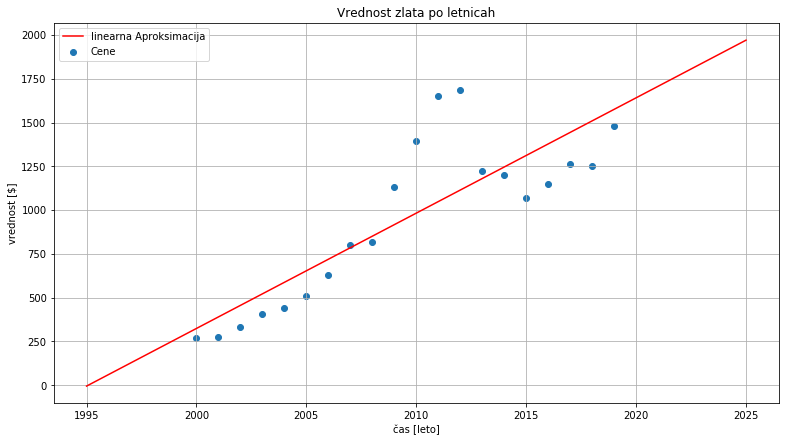

In [38]:
# Izrišemo graf

letnice = np.linspace(1995, 2025, 500)
plt.figure(figsize=(13,7))
plt.plot(letnice, polinom_fit(letnice), label="linearna Aproksimacija",color='r')
plt.scatter(aprox_x, aprox_y, label="Cene")
plt.title("Vrednost zlata po letnicah")
plt.ylabel('vrednost [$]')
plt.xlabel('čas [leto]')
plt.grid()
plt.legend()
plt.show()

## Uporabniški vmesnik

V primeru, da analiziramo pojav za neko podjetje je zelo primerno, da se naredi GUI (graphical user interface) s katerim lahko manj izskušeni inžinerji uporavljajo naše izračune in logiko analize za generične primere sorodnih tematik. Uporabljal bom uporabniški vmesnik, ki ga ponuja knjižnica matplotlib.

V našem primeru sem ustvaril GUI v katerem lahko uporabnik spreminja parametre poševnega meta z upoštevanim primerom v katerem lahko spreminja začetno $v_x$ in $v_y$ hitrost... Uporabniški vmesnik tudi prikaže maksimalen doseg po $y$ in $x$ smeri kakor tudi prikaze čas potovanja.

V istem direktoriju se nahaja modul `GUI.py` v katerem sem vnesel primer uporabniškega vmesnika. Da lahko poženete uporabniški vmesnik je potrebno naložiti knjiznico `pyqtgraph`.

<code style="text-align:center">pip install pyqtgraph</code>

Potem pa lahko poženete naslednjo vrstico, da se odpre uporabniški vmesnik.

Kodo za GUI sem našel na spletu, ter jo malce spremenil.

<a href="https://stackoverflow.com/questions/42007434/slider-widget-for-pyqtgraph">Koda za uporabniški vmesnik</a>

Pomagal pa sem si še z:

<a href="http://www.pyqtgraph.org/">Pyqtgraph.org</a>

In [39]:
import GUI
GUI.main()

SystemExit: 0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
